<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# autoreload updated and newly installed packages
# without having to restart Jupyter kernel
%load_ext autoreload
%autoreload 2
# Some little interaction with matplotlib
%matplotlib inline                
# Avoid using Jedi for faster autocomplete (tab)
%config Completer.use_jedi = False

## Crack growth analysis

### Hollow cylinder with crack on the external surface 

In [2]:
# Standard imports
import datetime
import platform
import os
import sys
from typing import List
# Non-standard imports
import matplotlib
import matplotlib.pyplot as plt
import numba as nb
import numpy as np
import pandas as pd
import plotly.graph_objs as go
# py-fatigue import
import py_fatigue as pf
import py_fatigue.testing as test
# Paths of this tutorial and of the data
TUTORIAL_PATH = os.path.dirname(os.getcwd())
DATA_PATH = os.path.join(TUTORIAL_PATH, "Data")
if not TUTORIAL_PATH in sys.path:
    sys.path.append(TUTORIAL_PATH)
np.set_printoptions(threshold=sys.maxsize)

In [3]:
print(f"Platform: {platform.platform()}")
print(f"Python version: {sys.version}")
print(f"py-fatigue version: {pf.styling.TermColors.CBOLD}{pf.__version__}")

print(f"{pf.styling.TermColors.CWHITEBG}\
{pf.styling.TermColors.CBOLD}\
{pf.styling.TermColors.CBLUE}")
      
print(f"DATA_PATH = {DATA_PATH}")
print(f"TUTORIAL_PATH = {TUTORIAL_PATH}")

print(f"{pf.styling.TermColors.CEND}")

Platform: Linux-5.15.0-52-generic-x86_64-with-glibc2.35
Python version: 3.9.7 (default, Sep 20 2022, 16:21:01) 
[GCC 11.2.0]
py-fatigue version: 1.2.0

DATA_PATH = /home/pd/Python/Packages/py-fatigue/Data
TUTORIAL_PATH = /home/pd/Python/Packages/py-fatigue



In [4]:
plt.rcParams["figure.figsize"] = (7, 3.5)
plt.rcParams["font.family"] = ["serif"]
plt.rcParams["font.size"] = 10
plt.rcParams["lines.markersize"] = 3
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linestyle"] = "-"
plt.rcParams["grid.color"] = "#DDDDDD"
plt.rcParams["grid.linestyle"] = "-"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.labelbottom"] = True
plt.rcParams["ytick.left"] = False
plt.rcParams["ytick.labelleft"] = True

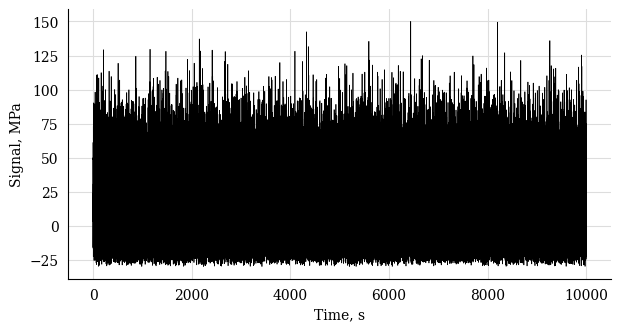

In [5]:
import py_fatigue as pf
import py_fatigue.testing as test

# Simulate a random signal
t = test.get_sampled_time(duration=10000, fs=10)
s = test.get_random_data(
    t=t, min_=-30, range_=180, random_type="weibull", a=2., seed=42
)
# Plot the signal
plt.plot(t, s, 'k', lw=0.5)
plt.xlabel("Time, s")
plt.ylabel("Signal, MPa")
plt.show()

In [6]:
# CycleCount definition
cycle_count = pf.CycleCount.from_timeseries(
    time=t, data=s, mean_bin_width=3., range_bin_width=3.,
)
cycle_count

,None
Cycle counting object,
"largest full stress range, MPa",179.026964
"largest stress range, MPa",180.0
number of full cycles,33317
number of residuals,23
number of small cycles,0
stress concentration factor,N/A
residuals resolved,False
mean stress-corrected,No


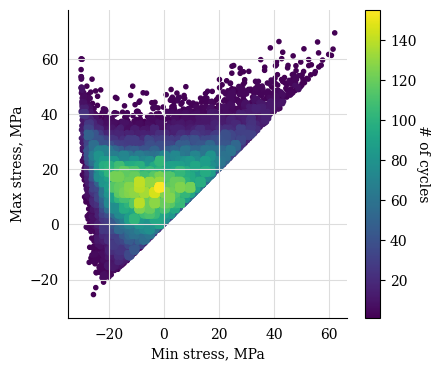

In [7]:
fig, ax = plt.subplots(1,1, figsize=(4.5, 4))
cycle_count.plot_histogram(fig=fig)
plt.show()

In [8]:
exp_dict_legacy = cycle_count.as_dict(
    max_consecutive_zeros=20, damage_tolerance_for_binning=0.2, legacy_export=True
)
print(exp_dict_legacy)

{'nr_small_cycles': 99, 'range_bin_lower_bound': 0.2, 'range_bin_width': 3.0, 'hist': [1346.0, 1485.0, 1433.0, 1397.0, 1455.0, 1493.0, 1479.0, 1471.0, 1348.0, 1432.0, 1361.0, 1234.0, 1236.0, 1203.0, 1146.0, 1103.0, 1072.0, 983.0, 957.0, 853.0, 808.0, 806.0, 679.0, 659.0, 570.0, 520.0, 449.0, 451.0, 397.0, 376.0, 289.0, 259.0, 236.0, 237.0, 164.0, 160.0, 120.0, 89.0, 85.0, 92.0, 60.0, 54.0, 39.0, 20.0, 24.0, 24.0, 17.0, 12.0, 10.0, 8.0, 2.0, 5.0, 6.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 1.0], 'lg_c': [], 'res': [64.9527, 76.1706, 83.8523, 112.955, 115.81, 123.7286, 125.499, 137.6065, 138.7786, 139.5674, 140.8493, 159.0391, 159.1209, 167.0853, 167.157, 180.0, 179.8804, 122.301, 115.1474, 58.9131, 53.762, 31.8885], 'res_sig': [49.8674, -15.0853, 61.0853, -22.767, 90.188, -25.622, 98.1066, -27.3924, 110.2141, -28.5645, 111.0029, -29.8464, 129.1926, -29.9283, 137.157, -30.0, 150.0, -29.8804, 92.4207, -22.7267, 36.1864, -17.5756, 14.3128, 14.2784]}


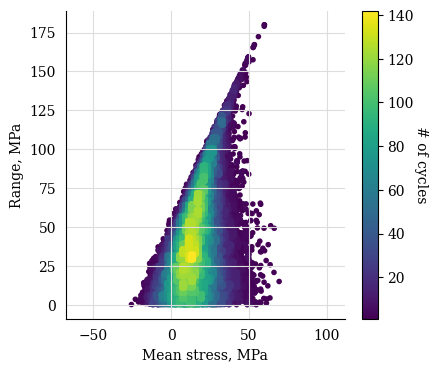

In [9]:
fig, ax = plt.subplots(1,1, figsize=(4.5, 4))
cycle_count.plot_histogram(fig=fig, plot_type="mean-range")
plt.show()

In [10]:
exp_dict = cycle_count.as_dict(
    max_consecutive_zeros=20, damage_tolerance_for_binning=1,
)
print(exp_dict)

{'nr_small_cycles': 99, 'range_bin_lower_bound': 0.2, 'range_bin_width': 3.0, 'mean_bin_lower_bound': -25.5, 'mean_bin_width': 3.0, 'hist': [[0.0, 1.0], [1.0, 1.0], [4.0, 5.0, 4.0, 1.0, 3.0], [14.0, 17.0, 9.0, 10.0, 6.0, 4.0, 0.0, 2.0, 1.0], [31.0, 31.0, 21.0, 20.0, 13.0, 10.0, 6.0, 7.0, 4.0, 5.0], [33.0, 51.0, 24.0, 39.0, 31.0, 28.0, 22.0, 15.0, 13.0, 6.0, 2.0, 3.0, 1.0], [56.0, 68.0, 63.0, 40.0, 45.0, 40.0, 36.0, 41.0, 19.0, 22.0, 18.0, 11.0, 7.0, 2.0, 1.0], [74.0, 91.0, 78.0, 60.0, 78.0, 60.0, 75.0, 46.0, 44.0, 44.0, 40.0, 20.0, 19.0, 18.0, 4.0, 2.0], [89.0, 117.0, 101.0, 101.0, 88.0, 101.0, 104.0, 84.0, 78.0, 85.0, 67.0, 52.0, 44.0, 41.0, 25.0, 20.0, 8.0, 7.0, 2.0], [110.0, 104.0, 133.0, 125.0, 116.0, 126.0, 114.0, 140.0, 106.0, 107.0, 114.0, 68.0, 79.0, 64.0, 61.0, 43.0, 27.0, 22.0, 14.0, 5.0, 6.0], [129.0, 118.0, 115.0, 145.0, 128.0, 124.0, 156.0, 165.0, 106.0, 159.0, 138.0, 119.0, 129.0, 119.0, 97.0, 91.0, 81.0, 57.0, 56.0, 26.0, 15.0, 10.0, 2.0], [106.0, 125.0, 128.0, 132.0, 15

In [11]:
cycle_count_d = pf.CycleCount.from_rainflow(exp_dict, name="Random Signal")
cycle_count_d

,Random Signal
Cycle counting object,
"largest full stress range, MPa",179.027
"largest stress range, MPa",180.0
number of full cycles,33219
number of residuals,22
number of small cycles,99
stress concentration factor,N/A
residuals resolved,False
mean stress-corrected,No


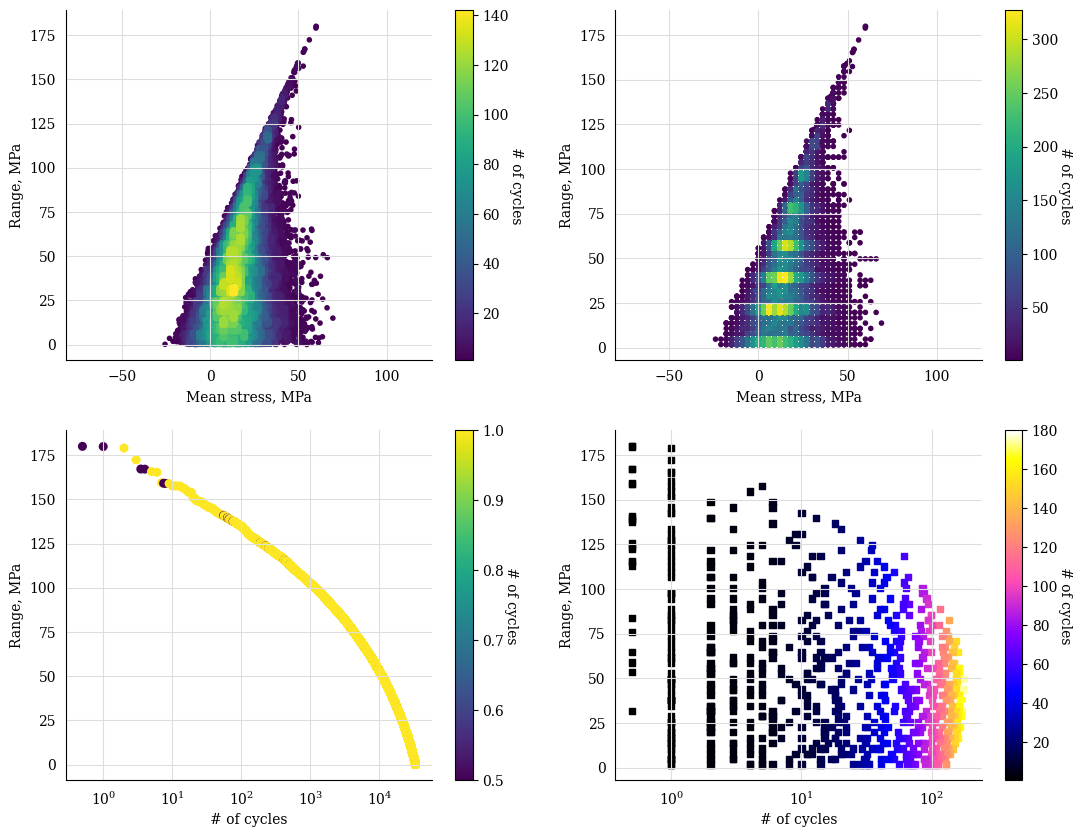

In [12]:
fig, axs = plt.subplots(2,2, figsize=(13, 10))
cycle_count.plot_histogram(fig=fig, ax=axs[0][0], plot_type="mean-range")
cycle_count_d.plot_histogram(fig=fig, ax=axs[0][1], plot_type="mean-range")
cycle_count.plot_histogram(fig=fig, ax=axs[1][0], plot_type="counts-range-cumsum", s=30)
cycle_count_d.plot_histogram( fig=fig, ax=axs[1][1], plot_type="counts-range",
                    marker='s', s=20,
                    cmap=matplotlib.cm.get_cmap("gnuplot2"))  # changing colormap
axs[1][1].set_xscale("log")
axs[1][0].set_xscale("log")
plt.show()